<img src='images/presentation.png'>

<p>
    <h2>Overview</h2>
    <br/>
    The goal of this notebook is to bring a guide of how to work with an unlabeled dataset, this kind of dataset are dealt with unsupervised learning tasks and Clustering Analysis Algorithms, the following list of tasks and algorithm are helpful to properly deal with unlabeled dataset, this notebook will explain every single of this taks:
    <ul>
        <li>Load and Visualize Data and Clusters with Scatter Plots.</li>
        <li>Prepare Data for Cluster Analysis.</li>
        <li>Perform Centroid Clustering with <a href=''>K-Means</a></li>
        <li>Interpret Clustering Results.</li>
        <li>Determine the optimal number of clusters for a given dataset.</li>
    </ul>
<br/>
<div style='background-color:#f1fbff;padding:2%;'>
    <h3><i>Unsupervised Learning tasks are dealt with algorithms that must automatically learn patterns from data by themselves 
        as no target variables are not present, the target variable is unknown</i>.</h3>
    <br/>
</div>
<br>
<hr>
<h2>Dataset Description</h2>
<br>
The Clustering Analysis will be done with an open source dataset shared publicly by the <a href='https://www.ato.gov.au/'>Australian Taxation Office (ATO)</a>. The dataset consists of statistics about each postcode (also known as a zip code, which is an identification code used for sorting mail by area) in Australia during the financial year of 2014-15.
<br>
<br>
The Australian Taxation Office (ATO) dataset can be downloaded from <a href='https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'>here</a>.
<br>
<br>
The Clustering Analysis will be done for <code>Average net tax</code> and <code>Average total deductions</code> features (columns). The objective is to find clusters (or groupd) of postcodes sharing similar patterns in terms of tax received and money deducted.
<br>
<h2>Import Necessary Libraries and Packages</h2>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import altair as alt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

<p>
<h2>Exploratory Data Analysis</h2>
<h4>What it is Exploratory Data Analysis?</h4>
<br>
Exploratory Data Analysis is a critical process of performing initial investigations on data in order to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
<br>
<br>
To start, we must save the link for downloading the dataset in a constant.

In [2]:
FILE_URL = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter05/DataSet/taxstats2015.csv'

By using <code>pandas</code> library and its function <code>read_csv()</code> and passing as a parameter the <code>FILE_URL</code>, the dataset is loaded into memory.

In [3]:
df = pd.read_csv(FILE_URL)

Now the dataset is loaded into memory, with the function <code>info</code>, let's display info releated to  the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 28 columns):
Postcode                                2473 non-null int64
Count taxable income or loss            2473 non-null int64
Average taxable income or loss          2473 non-null int64
Median taxable income or loss           2473 non-null int64
Count salary and wages                  2473 non-null int64
Average salary and wages                2473 non-null int64
Median salary and wages                 2473 non-null int64
Count net rent                          2473 non-null int64
Average net rent                        2473 non-null int64
Median net rent                         2473 non-null int64
Count total income or loss              2473 non-null int64
Average total income or loss            2473 non-null int64
Median total income or loss             2473 non-null int64
Count total deductions                  2473 non-null int64
Average total deductions                2473 non-null

<code>info</code> displays:
<ul>
    <li>Columns names.</li>
    <li>Columns data types.</li>
    <li>Quantity of rows.</li>
    <li>Quantity of null values.</li>
    <li>Memory usage.</li>
</ul>

This information can be accessed by individual releated function, these functions are:
<br>
<br>
<code>shape()</code>: displays number of rows and number of columns.

In [5]:
df.shape()

TypeError: 'tuple' object is not callable

<code>count</code>: displays the number of values in each column.

In [ ]:
df.count()

<code>dtypes</code>: display the data type of each column presented in the dataset.

In [ ]:
df.dtypes

<code>dtypes.value_counts</code>: Returns the data types of the columns found in the dataset and how many columns are which that data type. 

In [ ]:
df.dtypes.value_counts()

<code>isnull().values.any()</code>: Checks if there are any null values in the dataset.

In [ ]:
df.isnull().values.any()

As it was explained earlier that the Clustering Analysis will be done by using only two features, to select such specific features/colums, use the function <code>read_csv</code> with the <code>usecols</code> parameters with the names of the columns that are going to be used.

In [ ]:
df = pd.read_csv(FILE_URL, usecols=['Postcode', 'Average net tax', 'Average total deductions'])

The <code>head</code> function will display the first <i>n</i> values of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [ ]:
df.head()

The <code>tail</code> function will display the last <i>n</i> samples of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [ ]:
df.tail()

The <code>sample</code> function will display <i>n</i> random samples of the dataset, the parameter <i>n</i> can be specified, by default is 5.

In [ ]:
df.sample(5)

Using the functions <code>head()</code>, <code>tail</code> and <code>sample</code> gives an overview of how the samples of the dataset are, as we know by the methods <code>dtypes.value_counts()</code>, the dataset is formed by only integer values, this means that the dataset is continuos.
<br>
<br/>
The method <code>describe()</code>: Returns basic stadistics values for each feature.

In [ ]:
df.describe()

These stadistics can be accessed individually. In the following rows each statisdict from the columns <code>Average total deductions</code> and <code>Postcode</code> will be accessed individually, as it is visible one of the columns contains blank spaces, this means that this column to has to be accessed by a different way, even though its name can be changed, for simplicity of access, this will be done once it has been demostrated how to access its statistics.
<br>
<br>
Accessing <code>count</code> for both columns.

In [ ]:
df.Postcode.count()

In [ ]:
df['Average total deductions'].count()

Accessing <code>mean</code> for both columns.

In [ ]:
df.Postcode.mean()

In [ ]:
df['Average total deductions'].mean()

Accessing <code>std</code> for both columns.

In [ ]:
df.Postcode.std()

In [ ]:
df['Average total deductions'].std()

Accessing <code>min</code> for both columns.

In [ ]:
df.Postcode.min()

In [ ]:
df['Average total deductions'].min()

Accesing the <code>quantile</code>, this is done by accesing the percentiles and should all be in the interval [0, 1].
<br>
<br>
<b>Quantiles and Percentiles brief explanation</b>
<br>
<br>
<br>
<br>
Quantiles for <code>Postcode</code>:

In [ ]:
df.Postcode.quantile(0.25)

In [ ]:
df.Postcode.quantile(0.50)

In [ ]:
df.Postcode.quantile(0.75)

In [ ]:
df.Postcode.quantile(1)

Quantiles for <code>Average total deductions</code>:

In [ ]:
df['Average total deductions'].quantile(0.25)

In [ ]:
df['Average total deductions'].quantile(0.50)

In [6]:
df['Average total deductions'].quantile(0.75)

2877.0

In [7]:
df['Average total deductions'].quantile(1)

25472.0

Accessing <code>max</code> for both columns.

In [8]:
df.Postcode.max()

7470

In [9]:
df['Average total deductions'].max()

25472

Changing the name of columns with blank spaces, for easier accessibility. This is done by the method <code>rename</code>, by passing a dictionary with the name of the column(s) that is wanted to be changed and its new name, as the parameter <code>column</code> and the <code>True</code> for the parameter <code>inplace</code>, this will modify the dataset. <a href=''>check the docs</a> for a better understanding.

In [10]:
df.rename(columns={"Average total deductions": "Average_total_deductions", "Average net tax": "Average_net_tax"}, inplace=True)

Check the changes, by trying to access a metric.

In [11]:
df.Average_total_deductions.mean()

2682.6696320258793

In [12]:
df.Average_net_tax.mean()

15857.38293570562

Nice! Their names were changed, now it is easier to access their info.

<h3>Load and Visualize Data and Clusters with Scatter Plots</h3>
<br>
<div style="margin:10px auto;">
  <p>
      <a href='https://en.wikipedia.org/wiki/Scatter_plot'>Scatter plot</a>, from Wikipedia says:
  </p>
  <blockquote style='margin-left: 0;padding-left: 1em;border-left: 5px solid deepPink;'>
    A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.
  </blockquote>
</div>
<h4>Plotting Distribution Plots</h4>
<br>
The distribution plot, as the name suggests is used for one purpose; displaying the distribution and range of data values over a scale. A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 
<br>
<br>
The x-axis is the value of the variable just like in a histogram, <a href='https://stats.stackexchange.com/questions/48109/what-does-the-y-axis-in-a-kernel-density-plot-mean'>but what exactly does the y-axis represent?</a> The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. <a href='https://stats.stackexchange.com/questions/4220/can-a-probability-distribution-value-exceeding-1-be-ok'>The difference is the probability density is the probability per unit on the x-axis.</a> To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.
<br>
<br>
The method <code>distribution_plot</code> takes the column to be plotted, a title to give a name to the plot, the label of the x axes and the fontsize, just some back and front end properties.

In [106]:
def distribution_plot(column, title, xlabel):
    sns.set(rc={"figure.figsize": (12,  6),
                "axes.titlesize": 24,
                "axes.labelsize": 18},
            style="darkgrid")

    dist_plot = sns.distplot(column)
    dist_plot.axes.set_title(title)
    dist_plot.set_ylabel('Density')
    dist_plot.set_xlabel(xlabel)

Let's plot the <code>Average_net_tax_distribution</code> column.

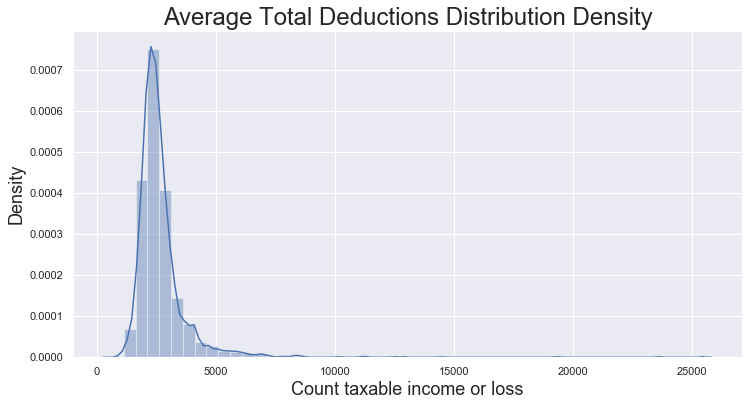

In [107]:
distribution_plot(df.Average_total_deductions, 'Average Total Deductions Distribution Density' , df.columns[1])

It is clear that most of the values from <code>Average_total_deductions</code>, between the ranges from 0 to 5000, even though it can be seem that the these values shared closely probabilities to appear again. Now let's plot the label <code>Average_net_tax</code> distribution.
<br>

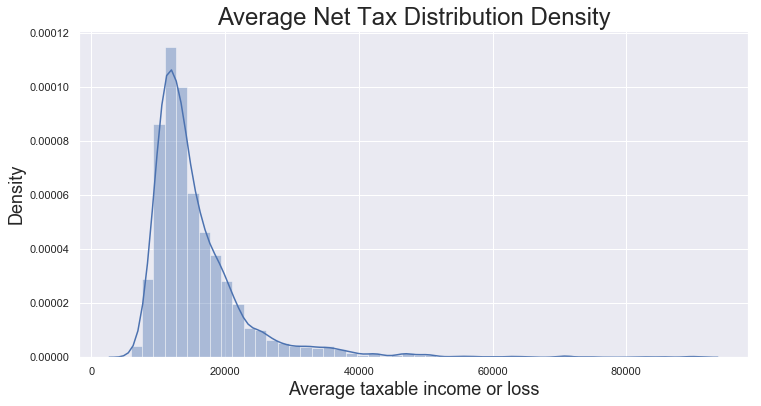

In [108]:
distribution_plot(df.Average_net_tax, 'Average Net Tax Distribution Density', df.columns[2])

It happens something very similar, the distribution is more on the left side of the x axes, most of the values are in the range from 0 to 10000, but they do also share a similar probability of appeareance. 
<br>
<br>
<b>Skewness</b>: It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail.
<br>
<br>
<img src='images/skewness.png' alt='Skewness Image from Wikipedia' style="width:50%;">
<br>
<b>Kurtois</b>: Describes the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.
<br>
<br>
<b><i>What about our data?</b></i>
<br>
<br>
The tails on the right side of the distributions are longer and fatter. The mean and median will be greater than the mode, this is telling us that there are outliers, but due to the close probobality of them, they might not affect negatively.
<br>
<br>
Let's plot the linearity between the feature <code>Average_total_deductions</code> and <code>Average_net_tax</code> the regression label, this is done through a Regression analysis which is a form of predictive modelling technique that investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for finding the causal effect relationship between the variables. <a href='https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/'>Check here for a better understanding.</a>

In [101]:
def distribution_lmplot(title, x, y, data):
    sns.set(rc={"axes.titlesize": 24,
                "axes.labelsize": 18})
    dist_plot = sns.lmplot(x=x, y=y, data=data, size=5.5, aspect=2)
    ax = plt.gca()
    ax.set_title(title)

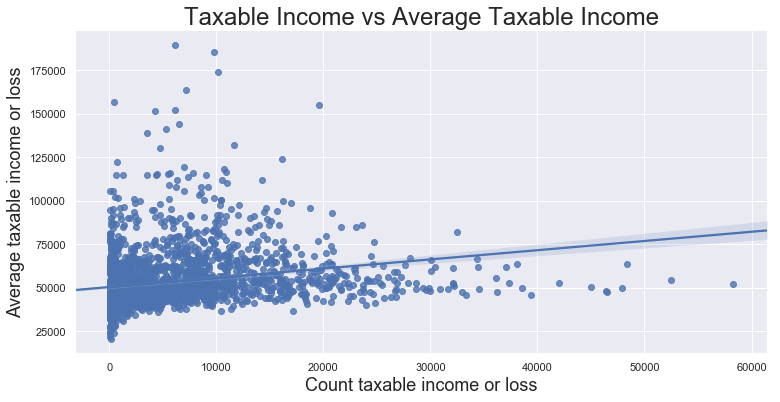

In [102]:
distribution_lmplot('Taxable Income vs Average Taxable Income', df.columns[1], df.columns[2], df)

Poor linearity, the independence is not relevant. Let's see with the feature <code>Postcode</code> and the label </code>Average_net_tax</code>.

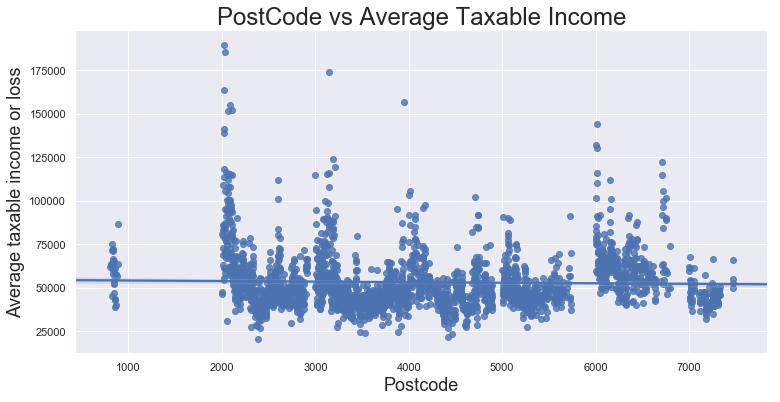

In [103]:
distribution_lmplot('PostCode vs Average Taxable Income', df.columns[0], df.columns[2], df)

The dependence is still poor, there is not an important remarkable relationship that determines that the <code>Postcode</code> is strongly related to the <code>Average_net_tax</code>. Let's go with some swarm plot.
<br>
<br>
<b>Swarm Plots</b>: In a swarm plot the locations of points are adjusted automatically to avoid overlap even if the jitter value is not applied. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them). These plots resemble bees swarming, 

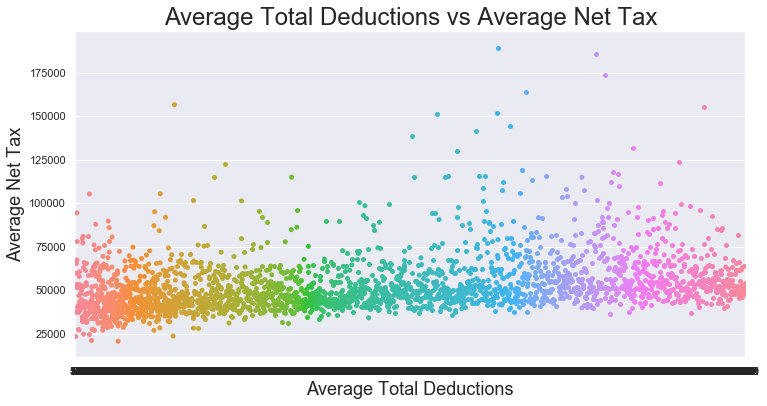

In [109]:
sns.set(rc={"figure.figsize":(12,  6),
                "axes.titlesize":24,
                "axes.labelsize":18},
            style="darkgrid")

dist_plot = sns.swarmplot(x=df.columns[1], y=df.columns[2], data=df);
dist_plot.axes.set_title('Average Total Deductions vs Average Net Tax')
dist_plot.set_ylabel('Average Net Tax')
dist_plot.set_xlabel('Average Total Deductions')
dist_plot


According this swarm plot, the <code>Average_total_deductions</code>, are not directly related to the <code>Average_net_tax</code>.
<br>
<br>
<a href='https://www.pgconocimiento.com/diagrama-boxplot/'>b</a>
<a href='https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51'>Medium</a>
<a href='https://medium.com/dayem-siddiqui/understanding-and-interpreting-box-plots-d07aab9d1b6c'>Medium</a>

Our Exploratory Data Analysis has finished, through the EDA we learned that the dataset:
<ul>
    <li>The dataset does not have a normal distribution.</li>
    <li>High levels of positive skewness and kurtoise, very few outliers</li>
    <li>The probability of getting the same values are very low.</li>
    <li>There is not independence or strong relationship between <code>Average_total_deductions</code>, 
        <code>Postcode</code> and <code>Average_net_tax</code>.</li>
</ul>
<h2>Prepare Data for Cluster Analysis</h2>
<h3>Feature Scaling</h3>
<br>
To make the inference of the Clusterting Algorithm work faster, the technique that I will apply here is <code>MinMaxScaler</code>, <i>but why <code>MinMaxScaler</code> and not other methods?</i>:
<ul>
    <li>Preserves the shape of the original distribution.</li>
    <li>Doesn't reduce the importance of outliers.</li>
    <li>Least disruptive to the information in the original data.</li>
    <li>New values are going to be between 0 to 1.</li>
</ul>
<br>
<code>MinMaxScaler</code> <b>quick explanation!</b>: Scales features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. Its formula:
<br>
<br>
<div style='text-align:center;font-size:22px;'>
    $X_{sc} =  \frac{X - X_{min}}{X_{max} - X_{min}}$
</div>
<br>

Let's create the variable <code>X</code> that will hold the features <code>Average_net_tax</code> and <code>Average_total_deductions</code>.
<br>

In [371]:
X = df[['Average_net_tax', 'Average_total_deductions']]

Take a look at <code>X</code>, with the method <code>info</code> and <code>max</code>

In [360]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 2 columns):
Average_net_tax             2473 non-null int64
Average_total_deductions    2473 non-null int64
dtypes: int64(2)
memory usage: 38.7 KB


In [367]:
X.max()

Average_net_tax             90485
Average_total_deductions    25472
dtype: int64

Great, the <code>X</code> tuple, holds the feature <code>Average_net_tax</code> and <code>Average_total_deductions</code>.
<br>Now create the variable <code>min_max_scaler</code> that will be an object from the <code>MinMaxScaler</code>

In [372]:
min_max_scaler = MinMaxScaler()

Now fit <code>X</code> into the <code>min_max_scaler</code> object

In [373]:
min_max_scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

Create <code>X_scale</code> and scale the data with <code>transform</code>, the <code>transform</code> returns a <code>numpy</code> array.

In [374]:
X_scaled = min_max_scaler.transform(X)

Take a look at <code>X_scaled</code>, with the method <code>dtyoe</code> and <code>max</code>.

In [391]:
X_scaled.dtype

dtype('float64')

In [392]:
X_scaled[:,0].min(), X_scaled[:,0].max(), X_scaled[:,1].min(), X_scaled[:,1].max()

(0.0, 1.0000000000000002, 0.0, 1.0)

The <code>Average_net_tax</code> and <code>Average_total_deductions</code> were scaled, now they are in a smaller range, this will help in faster convergance.
<br>
<h2>Perform Centroid Clustering with K-Means</h2>
<br>
In this section of the notebook, the <a href='https://scikit-learn.org/stable/modules/clustering.html#k-means'>K-Means</a> algorithm will be explained, later in the term Cetroid Clustering will be too and at the end of this section <i><b>Centroid Clustering with K-Means</b></i> will be implemented.
<br>
<h3>K-Means</h3>
<br>
Due to its simplicity and high performance K-Means is one of the most popular algorithms for clustering analysis. The objective of K-Means is to group similar data points (or observations) together that will form a cluster. Think of it as grouping elements close to each other.
<br>
<br>
The objective of cluster analysis is to group observations with similar patterns together. Investigating this is to analyze the dataset row by row with the assigned cluster for each observation. This can be quite tedious, especially if the size of your dataset is quite big, so it would be better to have a kind of summary of the cluster results.

<div style="margin:10px auto;">
    <a href='https://scikit-learn.org/stable/modules/clustering.html#k-means'>K-Means</a>, from Scikit-Learn docs says:
    <blockquote>
      The K-Means algorithm clusters data by trying to separate samples in <b><i>n</i></b> groups of equal variance, 
      minimizing a criterion known as the inertia or <b><i>within-cluster sum-of-squares</i></b>. This algorithm requires 
      the number of clusters to be specified. It scales well to large number of samples and has been used across a large 
      range of application areas in many different fields.
      <br>
      <br>
      The K-Means algorithm divides a set of  samples  into  disjoint clusters , each described by the mean of the samples 
      in the cluster. The means are commonly called the <b><i>cluster “centroids”</i></b>; note that they are not, in 
      general, points from , although they live in the same space.
      <br>
      <br>
      The K-means algorithm aims to choose centroids that minimise the <b>inertia</b>, or <b>within-cluster sum-of-
      squares</b> criterion:
      <br>
      <br>
      <div style="text-align:center;font-size:22px;">
          $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
      </div>
      <br>
  </blockquote>
</div>

<blockquote>
Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
<ul>
    <li>Inertia makes the assumption that clusters are <a href='https://en.wikipedia.org/wiki/Convex_function'>convex</a> 
        and isotropic (uniformity in all orientations), which is not always the case. It responds poorly to elongated 
        clusters, or manifolds with irregular shapes.</li>
    <li>Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very 
        high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse 
        of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior 
        to K-Means clustering can alleviate this problem and speed up the computations.</li>
</ul>
</blockquote>

<blockquote>
    K-Means steps:
    <ul>
        <li>The first step chooses the initial centroids, with the most basic method being to choose  samples from the 
            dataset. After initialization, K-means consists of looping between the two other steps. The first step 
            assigns each sample to its nearest centroid.</li>
        <li>The second step creates new centroids by taking the mean value of all of the samples assigned to each 
            previous centroid.</li>
        <li>The difference between the old and the new centroids are computed and the algorithm 
            repeats these last two steps until this value is less than a threshold. In other words, it repeats until the
            centroids do not move significantly.</li>
    </ul>
</blockquote>

<blockquote>
    Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on 
    the initialization of the centroids. As a result, the computation is often done several times, with different 
    initializations of the centroids. One method to help address this issue is the <code>k-means++</code> initialization 
    scheme, which has been implemented in <code>scikit-learn</code> (use the <code>init='k-means++'</code> parameter). 
    This initializes the centroids to be (generally) distant from each other, leading to provably better results than 
    random initialization, as shown in the reference.
    <br>
    <br>
    The algorithm supports sample weights, which can be given by a parameter <code>sample_weight</code>. This allows to 
    assign more weight to some samples when computing cluster centers and values of inertia. For example, assigning a
    weight of 2 to a sample is equivalent to adding a duplicate of that sample to the dataset <b><i>X</i></b>.
    <br>
    <br>
    A parameter can be given to allow K-means to be run in parallel, called <code>n_jobs</code>. Giving this parameter a 
    positive value uses that many processors (default: 1). A value of <code>-1</code> uses all available processors, with
    <code>-2</code> using one less, and so on. Parallelization generally speeds up computation at the cost of memory (in 
    this case, multiple copies of centroids need to be stored, one for each job).
</blockquote>

<h3>Performing Clustering Analysis</h3>
<br>
Let's, use all the default values for the <code>KMeans</code> hyperparameters except for <code>random_state</code> and <code>n_jobs</code>. Specifying a fixed random state (also called a seed) will help in getting reproducible results every time rerunning the code is needed.

In [400]:
kmeans = KMeans(random_state=42, n_jobs=-1)

Let's fit <code>X_scaled</code> into the <code>kmeans</code> cluster algorithm analysis object.

In [401]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Excellent, those are the rest of parameters and its default hyperparameter, later in the section of Hyperparameter Tuning, these parameters will be change in order to achieve a better performance. Now let's predict some <i>clusters!</i>.

In [402]:
y_preds = kmeans.predict(X_scaled)
y_preds

array([1, 1, 2, ..., 2, 1, 5])

Great, we have gotten the predicted clusters!
<br>
Add these predictions into the original <code>DataFrame</code> and take a look at five random samples with the function <code>sample</code>:


In [405]:
df['cluster'] = y_preds
df.sample(5)

,Postcode,Average_total_deductions,Average_net_tax,cluster
2266,6490,5679,14849,7
1929,5413,2665,13908,2
1845,5222,2917,11691,0
1068,3649,2116,9510,0
2150,6225,1968,22065,5


Look the <code>kmeans</code> <b>model has grouped the sample 1845 and 1068 on the same cluster, cluster 0 </b>, but look at the sample 1929, it is grouped on the cluster 2, it looks that the model is basing its clustering decission on a range from the feature <code>Average_net_tax</code>.
<br>
<br>
We are interested in analyzing the results of the <code>kmeans</code> model in more detail. We already know that the objective of cluster analysis is to group observations with similar patterns together. <b>But what are those patterns?</b>
<br>
<h2>Interpret Clustering Results</h2>
<br>
<b>Please start thinking how can we measure how good our model is?</b> This question will be answered in the followings steps.
<h3>Pivot Table</h3>
<br>
A pivot table is a table of statistics that summarizes the data of a more extensive table (such as from a database, spreadsheet, or business intelligence program). This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way.
<br>
<br>
Pivot tables are a technique in data processing. They arrange and rearrange (or "pivot") statistics in order to draw attention to useful information.
<br>
<br>
By using the <code>pandas</code> package and its library <code>pivot_table</code>, we can get the significance of our features.
Its parameters that we are going to use are:
<ul>
    <li><code>values</code>: This parameter corresponds to the numerical 
        columns are wanted to calculate summaries for (or aggregations), 
        such as getting averages or counts. In our dataset, we will use 
        the <code>Average_net_tax</code> and 
        <code>Average_total_deductions</code> variables.</li>
    <li><code>index</code>: This parameter is used to specify the 
        columns that are wanted to see summaries for. In our case, it 
        will be the <code>cluster</code> column.</li>
    <li><code>aggfunc</code>: This is where it is specified the 
        aggregation functions that will summarize the data with, such 
        as getting averages or counts.</li>
</ul>
By  using the <code>numpy</code> implementation of <code>mean()</code> as it is more optimized for <code>pandas</code> <code>DataFrames</code>.

In [410]:
df.pivot_table(values=[df.columns[1], df.columns[2]], index=df.columns[3], aggfunc=np.mean)

,Average_net_tax,Average_total_deductions
cluster,,
0,10681.836117,2165.546973
1,30432.955882,3846.941176
2,14609.571075,2490.674907
3,70315.454545,9598.363636
4,44356.934783,5499.826087
5,20452.737470,2769.243437
6,67808.000000,22811.000000
7,15792.021978,4771.296703


This summary shows that the algorithm has grouped the data into eight clusters (clusters 0 to 7). Cluster 0 has the lowest <code>Average_net_tax</code> and <code>Average_total_deductions</code> amounts among all the clusters, while cluster 6 has the highest values. With this pivot table, we are able to compare clusters between them using their summarised values.
<br>
<br>
Interpreteing by using an aggregated view of clusters is a good way of seeing the difference between them, but it is not the only way. Another possibility is to visualize clusters in a graph. This is exactly what we are going to do now.
<h3>Cluster Visualization</h3>
<br>
The package <code>altair</code>, will allow us to visualize how these clusters are distributed, by instantiating a <code>Chart()</code> object wiht the <code>DataFrame</code> and save it into a variable called <code>chart</code>: 

In [411]:
chart = alt.Chart(df)

Let's specify the type of graph we want, a <b>scatter plot</b>, thanks to the method <code>mark_circle()</code>, save its results in a object called <code>scatter_plot</code>.

In [412]:
scatter_plot = chart.mark_circle()

The final step to see how the clusters are grouped and distributed, is to configure the <code>scatter_plot</code> by specifying the names of the columns that will be the <code>x</code> and <code>y</code> axes on the graph, with the parameter <code>color</code> is how we tell the <code>scatter_plot</code> object to color each point according to its cluster value, by adding a <code>:N</code> at the end of the <code>cluster</code> column name, this extra parameter is how <code>altair</code> understands the type of value for this column, <code>:N</code> it means the information contained in this column is categorical. The <code>Tooltip</code> parameter with the list of corresponding column names and by calling the method <code>interactive</code> will allow to hover over datapoints and displaying their values, therefore we obtained a dynamic scatter plot of how grouped and distributed the clusters are.

In [415]:
scatter_plot.encode(x='Average_net_tax', 
                    y='Average_total_deductions',
                    color='cluster:N', 
                    tooltip=['Postcode', 
                             'cluster', 
                             'Average_net_tax', 
                             'Average_total_deductions']).interactive()

alt.Chart(...)

Having an interactive scatter plot makes easier to find the boundaries between cluster, for example looking at the cluster number 3, it easy to realize its boundaries are in <code>Average_net_tax</code> close to 56K, its <code>Average_total_deductions</code> is 6.5K and most of its <code>Postcode</code> value are between 2K and 2.1K.
<h2>Determine the Optimal Number of Clusters for a Given Dataset</h2>